In [1]:
import geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import json

# Data Loading
Load the data which contains worldwide COVID-19 information before 2020-11-10.

In [2]:
data = None
with open('timeseries.json', 'r') as f:
    data = json.load(f)

In [3]:
# data['Afghanistan']
print('Countries: ', len(data.keys()))
print(list(data.keys())[:10])
print(data['US'][:3])
for k, v in data.items():
    assert len(v) == 294

Countries:  191
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria']
[{'date': '2020-1-22', 'confirmed': 1, 'deaths': 0, 'recovered': 0}, {'date': '2020-1-23', 'confirmed': 1, 'deaths': 0, 'recovered': 0}, {'date': '2020-1-24', 'confirmed': 2, 'deaths': 0, 'recovered': 0}]


# Trend
Plot the confirmed, deaths, recovered cases of US and generate the line chart.

In [4]:
df = pd.DataFrame(data['US']);
df.head()

,date,confirmed,deaths,recovered
0,2020-1-22,1,0,0
1,2020-1-23,1,0,0
2,2020-1-24,2,0,0
3,2020-1-25,2,0,0
4,2020-1-26,5,0,0


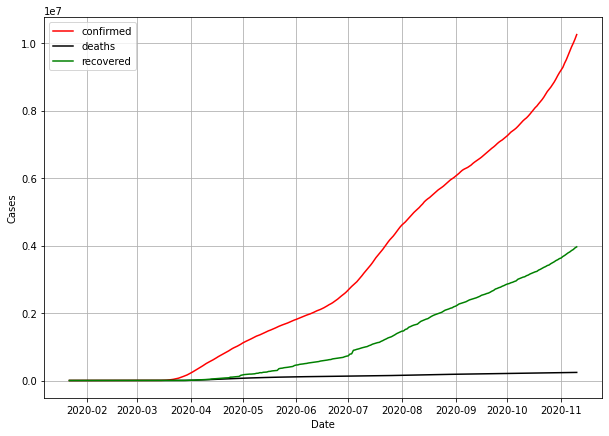

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
# convert the date string to date type
x = matplotlib.dates.datestr2num(df['date'])
# rotate the axis
# plt.xticks(rotation=45)

# plot the data
plt.plot_date(x, df['confirmed'], '-', color='red', label='confirmed')
plt.plot_date(x, df['deaths'], '-', color='black', label='deaths')
plt.plot_date(x, df['recovered'], '-', color='green', label='recovered')

# set the name of axes
plt.xlabel("Date")
plt.ylabel("Cases")
# show the legend
plt.legend()
# add grid
plt.grid()
plt.show()

# Race
Plot the worldwide confirmed cases in one day and sort them by the number of cases. Generate the static bar chart and then make it dynamic.

In [6]:
# process data to generate 2d Dataframe
con_arr = []
dea_arr = []
rec_arr = []
date_lst = []

for k, v in data.items():
    con_l, dea_l, rec_l = [], [], []
    for e in v:
        con_l.append(e['confirmed'])
        dea_l.append(e['deaths'])
        rec_l.append(e['recovered'])
    con_arr.append(con_l)
    dea_arr.append(dea_l)
    rec_arr.append(rec_l)

for e in data['China']:
    date_lst.append(e['date'])

con_df = pd.DataFrame(np.array(con_arr))
dea_df = pd.DataFrame(np.array(dea_arr))
rec_df = pd.DataFrame(np.array(rec_arr))
# add the date column to confirmed dataframe
con_df['name'] = list(data.keys())

In [7]:
con_df.head()

,0,1,2,3,4,5,6,7,8,9,...,285,286,287,288,289,290,291,292,293,name
0,0,0,0,0,0,0,0,0,0,0,...,41633,41728,41814,41935,41975,42033,42092,42297,42463,Afghanistan
1,0,0,0,0,0,0,0,0,0,0,...,21523,21904,22300,22721,23210,23705,24206,24731,25294,Albania
2,0,0,0,0,0,0,0,0,0,0,...,58574,58979,59527,60169,60800,61381,62051,62693,63446,Algeria
3,0,0,0,0,0,0,0,0,0,0,...,4888,4910,5045,5135,5135,5319,5383,5437,5477,Andorra
4,0,0,0,0,0,0,0,0,0,0,...,11228,11577,11813,12102,12223,12335,12433,12680,12816,Angola


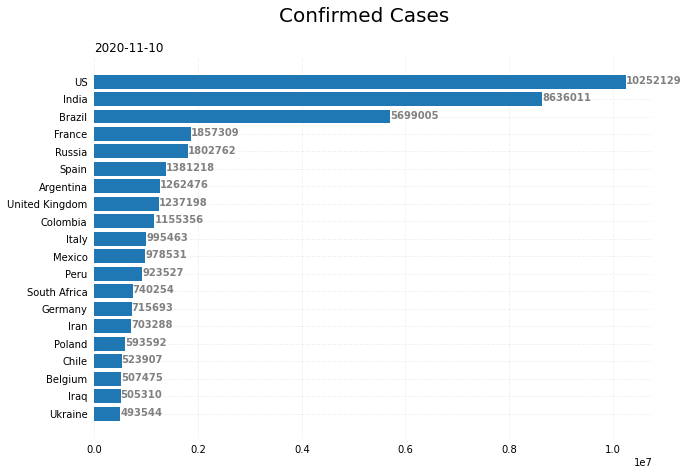

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
fig.suptitle('Confirmed Cases', fontsize=20)

for i in range(len(con_arr[0])):
    ax.cla()

#     con_df.sort_values(i, ascending=False, inplace=True)

#     name = con_df['name'].tolist()[:20]
#     score = con_df.iloc[:20, i]
    # sort the countries by the cases
    con_df.sort_values(293, ascending=False, inplace=True)

    name = con_df['name'].tolist()[:20]
    score = con_df.iloc[:20, 293]
      
    # Horizontal Bar Plot 
    ax.barh(name, score) 
      
    # Remove axes splines 
    for s in ['top', 'bottom', 'left', 'right']: 
        ax.spines[s].set_visible(False) 
      
    # Remove x, y Ticks 
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none') 
      
    # Add x, y gridlines 
    ax.grid(b = True, color ='grey', 
            linestyle ='-.', linewidth = 0.5, 
            alpha = 0.2) 
      
    # Show top values  
    ax.invert_yaxis() 
      
    # Add annotation to bars 
    for j in ax.patches: 
        plt.text(j.get_width()+0.2, j.get_y()+0.5,  
                 str(round((j.get_width()), 2)), 
                 fontsize = 10, fontweight ='bold', 
                 color ='grey') 
      
    # Add Plot Title 
#     ax.set_title(date_lst[i], 
#                  loc ='left', ) 
    ax.set_title(date_lst[293], 
             loc ='left', ) 
      
    # Show Plot
    plt.plot()
    plt.pause(1)
    break

# Map
Draw the world map and assign different color by the number of cases. 

In [9]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

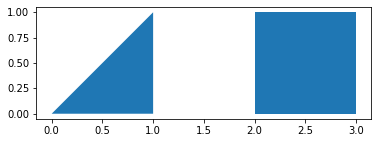

In [10]:
from shapely.geometry import Polygon
from geopandas import GeoSeries
p1 = Polygon([(0, 0), (1, 0), (1, 1)])
p2 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
g = GeoSeries([p1, p2])
g.plot()

In [11]:
w_lst = world['name'].tolist()
d_lst = list(data.keys())
for country in w_lst:
    if country not in d_lst:
        print(country)

W. Sahara
United States of America
Dem. Rep. Congo
Dominican Rep.
Falkland Is.
Greenland
Fr. S. Antarctic Lands
Puerto Rico
Côte d'Ivoire
Central African Rep.
Congo
Eq. Guinea
eSwatini
Palestine
Myanmar
North Korea
South Korea
Turkmenistan
New Caledonia
Solomon Is.
Taiwan
Antarctica
N. Cyprus
Somaliland
Bosnia and Herz.
Macedonia
S. Sudan


In [12]:
world.replace({'name':'W. Sahara'}, 'Western Sahara', inplace=True)
world.replace({'name':'United States of America'}, 'US', inplace=True)
world.replace({'name':'Dem. Rep. Congo'}, 'Congo (Kinshasa)', inplace=True)
world.replace({'name':'Dominican Rep.'}, 'Dominican Republic', inplace=True)
# no falkland, belongs to United Kingdom?
# no Greenland, belongs to Denmark?
# no Fr. S. Antarctic Lands, belongs to france?
# no Puerto Rico, belongs to US?
world.replace({'name':"Côte d'Ivoire"}, "Cote d'Ivoire", inplace=True)
world.replace({'name':'Central African Rep.'}, 'Central African Republic', inplace=True)
world.replace({'name':'Congo'}, 'Congo (Brazzaville)', inplace=True)
world.replace({'name':'Eq. Guinea'}, 'Equatorial Guinea', inplace=True)
world.replace({'name':'eSwatini'}, 'Eswatini', inplace=True)
world.replace({'name':'Palestine'}, 'West Bank and Gaza', inplace=True)
world.replace({'name':'Myanmar'}, 'Burma', inplace=True)
# no North Korea
world.replace({'name':'South Korea'}, 'Korea, South', inplace=True)
# no Turkmenistan
# no New Caledonia, belongs to France?
world.replace({'name':'Solomon Is.'}, 'Solomon Islands', inplace=True)
world.replace({'name':'Taiwan'}, 'Taiwan*', inplace=True)
# no Antarctica
# no N. Cyprus
# no Somaliland
world.replace({'name':'Bosnia and Herz.'}, 'Bosnia and Herzegovina', inplace=True)
world.replace({'name':'Macedonia'}, 'North Macedonia', inplace=True)
world.replace({'name':'S. Sudan'}, 'South Sudan', inplace=True)

In [13]:
con_arr = []
dea_arr = []
rec_arr = []

for k, v in data.items():
    con_l, dea_l, rec_l = [k], [k], [k]
    for e in v:
        con_l.append(e['confirmed'])
        dea_l.append(e['deaths'])
        rec_l.append(e['recovered'])
    con_arr.append(con_l)
    dea_arr.append(dea_l)
    rec_arr.append(rec_l)

con_arr = np.array(con_arr)
dea_arr = np.array(dea_arr)
rec_arr = np.array(rec_arr)
# print(con_arr.shape, dea_arr.shape, rec_arr.shape)
con_df = pd.DataFrame(con_arr)
con_df.rename(columns={0:'name'}, inplace=True)
merged = world.merge(con_df, on='name')
for i in range(1, len(con_l)):
    merged[i] = merged[i].astype('int64')
merged = merged.to_crs("EPSG:3395")

In [14]:
merged.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,1,2,3,4,...,285,286,287,288,289,290,291,292,293,294
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((20037508.343 -1800679.237, 200...",0,0,0,0,...,34,34,34,34,34,34,34,34,34,34
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((3774143.866 -105050.440, 3792946.708...",0,0,0,0,...,509,509,509,509,509,509,509,509,509,509
2,603253,Africa,Western Sahara,ESH,906.5,"POLYGON ((-964649.018 3185897.152, -964597.245...",0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-13674486.249 6242596.000, -13...",0,0,0,0,...,239649,243178,247916,250698,253482,258874,263220,267163,272034,276479
4,326625791,North America,US,USA,18560000.0,"MULTIPOLYGON (((-13674486.249 6242596.000, -13...",1,1,2,2,...,9199122,9281002,9404058,9507004,9632704,9757612,9886080,9995860,10115804,10252129


<AxesSubplot:>

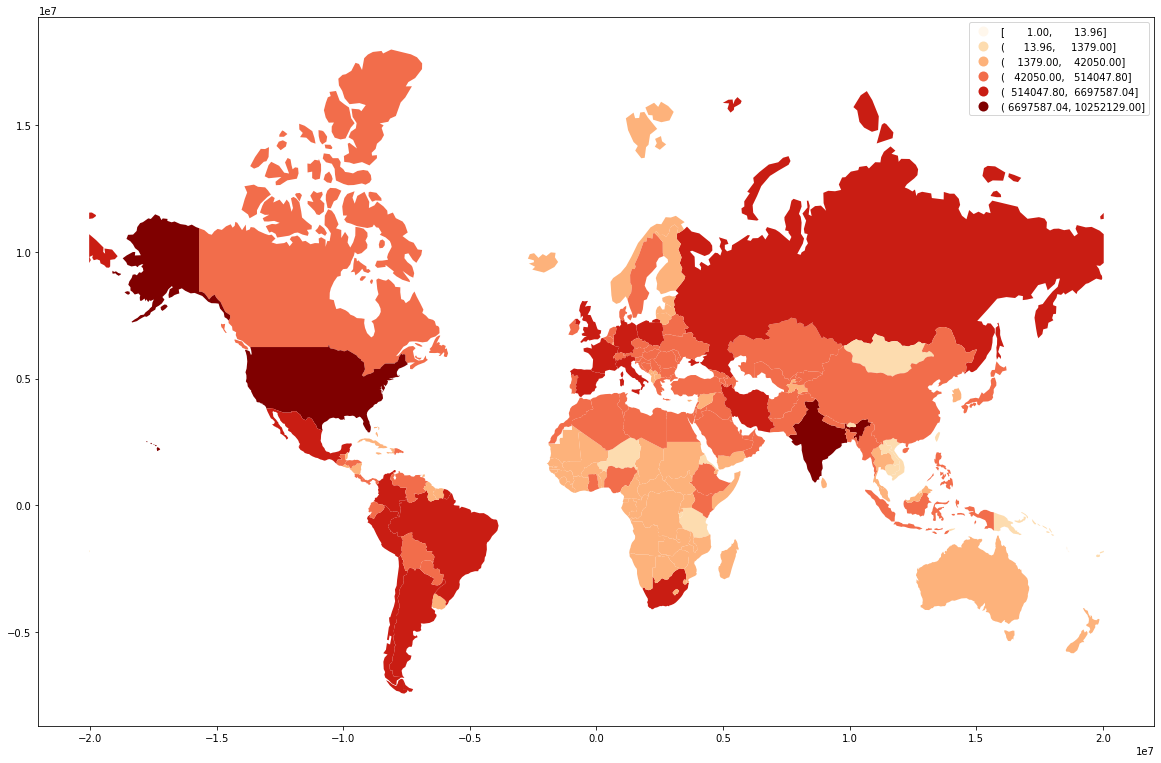

In [15]:
merged.plot(column=294,
#             ax=ax1,
#             ax=ax,
            legend=True,
            cmap='OrRd',
            scheme='percentiles',
            figsize=(20,20)
          )

<AxesSubplot:>

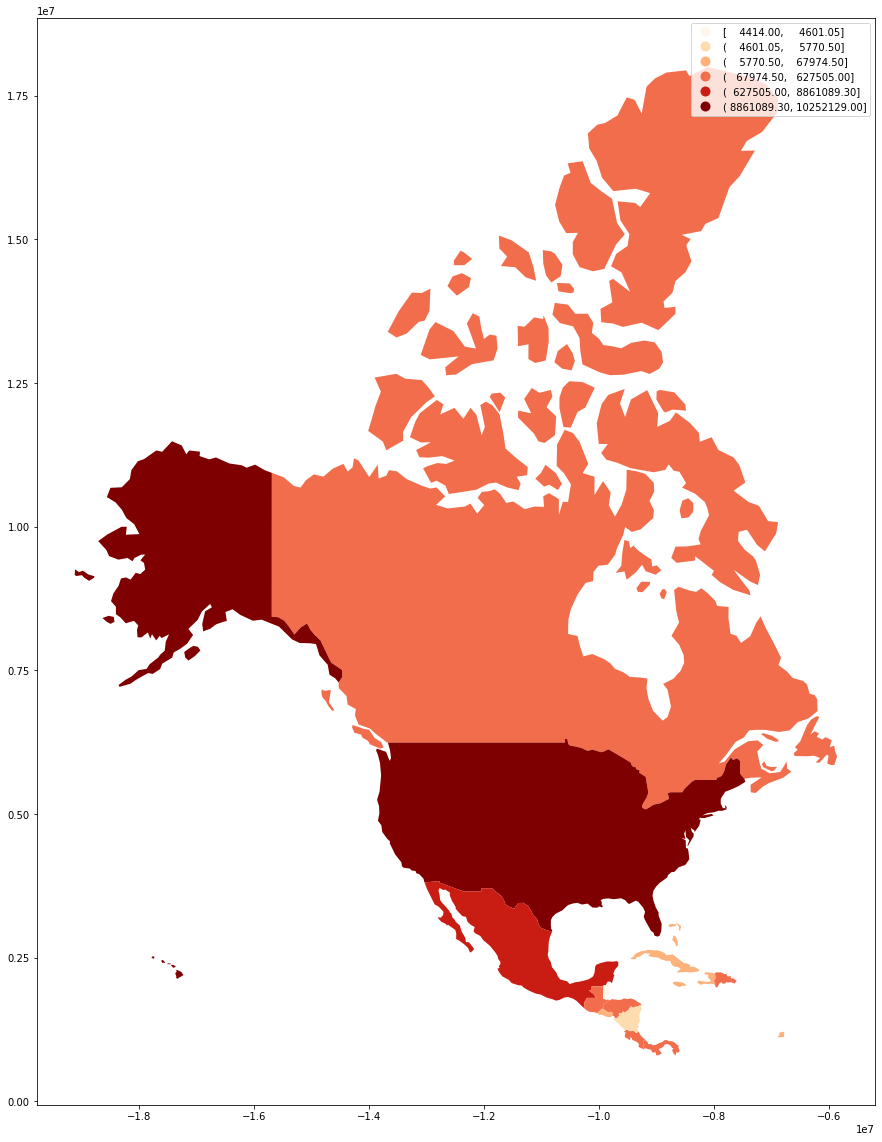

In [16]:
merged[merged.continent=='North America'].plot(column=294,
#             ax=ax1,
#             ax=ax,
            legend=True,
            cmap='OrRd',
            scheme='percentiles',
#             legend_kwds={'label': "Population by Country",
#                          'orientation': "horizontal"},
            figsize=(20,20)
          )